<a href="https://colab.research.google.com/github/rinpsr/Classification-stroke-using-KNN/blob/main/Ririn_Purnama_Sari_09011282126096_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Klasifikasi Penyakit Stroke dengan Metode KNN
Nama : Ririn Purnama Sari

NIM : 09011282126096

# Pemilihan Topik dan Dataset

Pemilihan Topik : Klasifikasi Penyakit Stroke dengan Metode KNN

Deskripsi Topik : Project ini akan mengklasifikasikan Penyakit Stroke dengan memanfaatkan data historis pasien dengan mengidentifikasi faktor-faktor resiko yang berkaitan dengan kemungkinan seseorang mengalami penyakit Stroke. Hasil Pengklasifikasian akan mengelompokkan kemungkinan pasien mengalami stroke atau tidak.

Plan Dataset :
Menggunakan dataset yang bersumber dari kaggle yang terdiri dari 11 kolom dan 4981 baris.

Dataset :
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset



# Eksplorasi dan Pemahaman Data

<h3> <b> Analisis dan Eksplorasi Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, recall_score

In [ ]:
df = pd.read_csv('stroke_dataset.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
print('Dataset Shape :',df.shape)

Dataset Shape : (4981, 11)


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Dengan melihat describe di atas dapat diketahui mean, min, Q1, Q2, Q3 dan nilai max dari tiap variabel.

Eksplorasi Dataset :
Dari dataset diatas terdapat 11 kolom dan 4981 baris. Variabel Kategorikal : gender, ever_married, work_type, Residence_type, smoking_status, dan stroke.
Variabel Numerik : age, avg_glucose_level, bmi. Dimana variabel stroke akan digunakan sebagai label dalam pengklasifikasian apakah pasien mengalami penyakit stroke atau tidak. Dibawah ini adalah penjelasan tiap variabel :    
1.   gender

      Variabel ini menunjukkan jenis kelamin pasien, yaitu M = Male dan F = Female. Dibawah ini adalah persebaran jumlah pada variabel gender, dimana female lebih banyak daripada male.

<Axes: xlabel='gender', ylabel='count'>

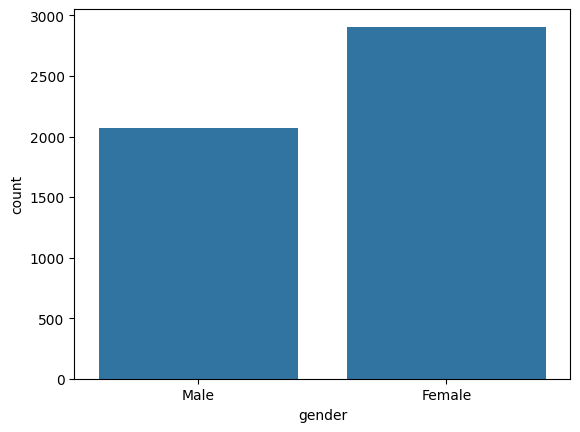

In [ ]:
sns.countplot(x = 'gender', data = df)

2. age

    Variabel ini menunjukkan usia pasien dalam tahun, setelah data di describe dapat diketahui bahwa usia termuda yaitu 0,08 atau 8 bulan dan usia tertua yaitu 82 tahun.

3. hypertension

    Variabel ini menunjukkan apakah pasien mengidap hipertensi (tekanan darah tinggi) atau tidak. Nilai 0 menandakan bahwa pasien tidak mengidap hipertensi, sementara nilai 1 menandakan keberadaan hipertensi pada pasien. Dibawah ini adalah persebaran jumlah pada variabel hypertension, dimana pasien yang tidak mengidap hipertensi lebih banyak daripada pasien yang mengidap hipertensi.

<Axes: xlabel='hypertension', ylabel='count'>

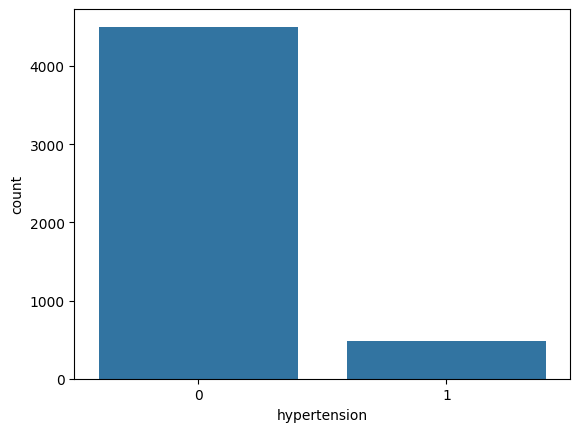

In [ ]:
sns.countplot(x = 'hypertension', data = df)

4. heart_disease

    Variabel ini menunjukkan keberadaan heart_disease (penyakit jantung) pada pasien. Nilai 0 menunjukkan bahwa pasien tidak memiliki penyakit jantung, sedangkan nilai 1 menandakan bahwa pasien memiliki penyakit jantung. Dibawah ini adalah persebaran jumlah pada variabel heart_disease, dimana pasien yang tidak mengidap penyakit jantung lebih banyak daripada pasien yang mengidap penyakit jantung.

<Axes: xlabel='heart_disease', ylabel='count'>

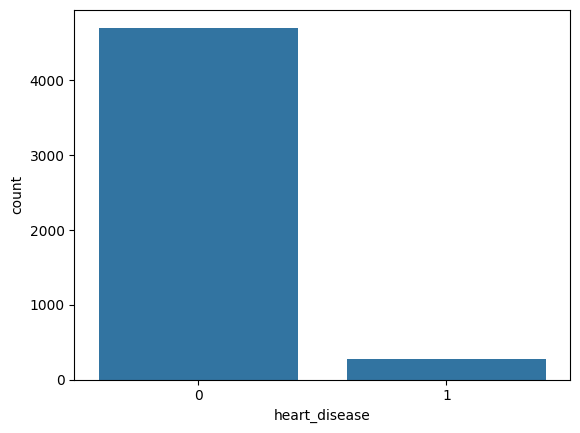

In [ ]:
sns.countplot(x = 'heart_disease', data = df)

5. ever_married

    Variabel ini menunjukkan status pernikahan pasien. 'Yes' menandakan bahwa pasien pernah menikah, sementara 'No' menunjukkan bahwa pasien belum pernah menikah. Dibawah ini adalah persebaran jumlah pada variabel ever_married, dimana pasien yang sudah menikah lebih banyak daripada pasien yang belum menikah.

<Axes: xlabel='ever_married', ylabel='count'>

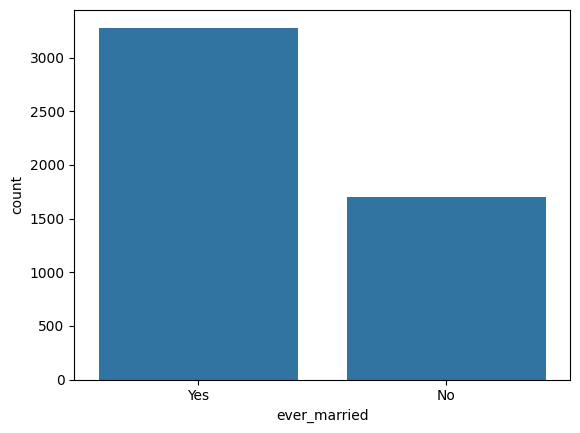

In [ ]:
sns.countplot(x = 'ever_married', data = df)

6. work_type

    Variabel ini menunjukkan jenis pekerjaan atau profesi pasien, yaitu children = Anak-anak, Private = Pekerja Swasta, Self-employed = Wiraswasta, Govt_job = Pekerja Pemerintah. Dibawah ini adalah persebaran jumlah pada variabel work_type, dimana pekerjaan yang paling banyak adalah private.
    

<Axes: xlabel='work_type', ylabel='count'>

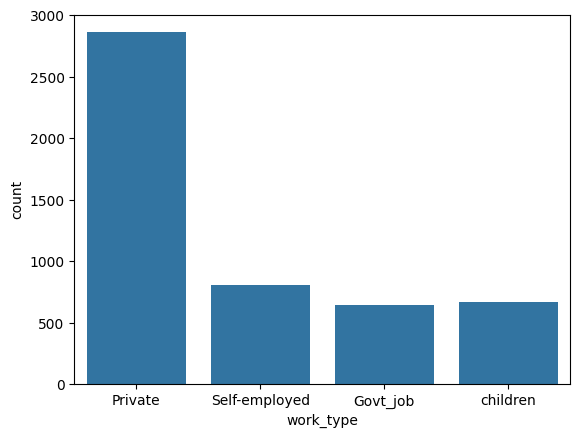

In [ ]:
sns.countplot(x = 'work_type', data = df)

7. Residence_type

    Variabel ini menunjukkan kategori tempat tinggal pasien, yaitu rural = pedesaan dan urban = perkotaan. Dibawah ini adalah persebaran jumlah pada variabel Residence_type, dimana pasien dengan tempat tinggal di perkotaan lebih banyak walaupun hanya berbeda sedikit.

<Axes: xlabel='Residence_type', ylabel='count'>

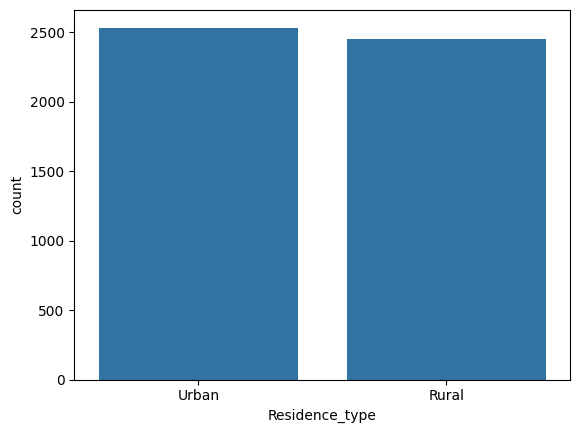

In [ ]:
sns.countplot(x = 'Residence_type', data = df)

8. avg_glucose_level

    Variabel ini memberikan informasi mengenai rata-rata tingkat glukosa dalam darah pasien, dalam satuan mg/dL. Setelah data di describe dapat diketahui bahwa tingkat glukosa pasien terendah yaitu 55,12 dan yang tertinggi adalah 271,74

9. bmi

    Variabel ini menyajikan nilai Indeks Massa Tubuh (BMI) pasien, yang bisa memberikan gambaran tentang berat badan relatif terhadap tinggi badan. BMI (Body Mass Index atau Indeks Massa Tubuh) dinyatakan dalam satuan kilogram per meter persegi (kg/m²). Berdasarkan data setelah di describe diketahui bahwa bmi terendah adalah 14 dan bmi tertinggi adalah 48,9.

10. smoking_status

    Variabel ini menunjukkan status merokok pasien, yaitu 'Pernah Merokok' (formerly smoked), 'Tidak Pernah Merokok' (never smoked), 'Merokok' (smokes), atau 'Tidak Diketahui' (Unknown). 'Unknown' menandakan bahwa informasi mengenai kebiasaan merokok pasien tidak tersedia. Dibawah ini adalah persebaran jumlah pada variabel smoking_status, dimana pasien dengan status tidak merokok memiliki jumlah terbanyak.

<Axes: xlabel='smoking_status', ylabel='count'>

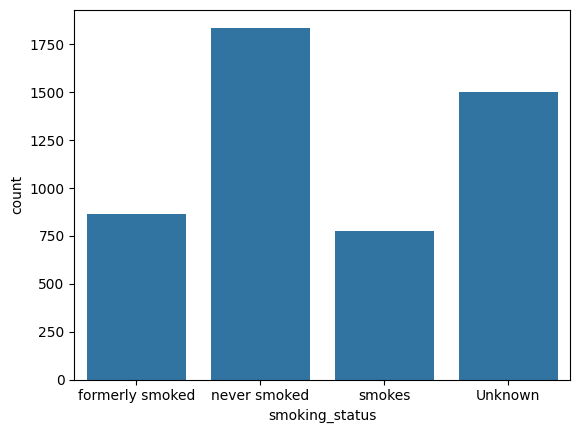

In [ ]:
sns.countplot(x = 'smoking_status', data = df)

11. stroke

    Variabel ini menunjukkan apakah pasien mengidap penyakit stroke atau tidak, yang kemudian akan digunakan sebagai label mengklasifikasikan apakah pasien mengidap stroke atau tidak. Nilai 0 menyatakan pasien tidak menderita penyakit stroke, sementara nilai 1 menyatakan pasien menderita penyakit stroke. Dibawah ini adalah persebaran jumlah pada variabel stroke, dimana pasien yang menderikan stroke lebih banyak daripada pasien yang tidak menderita stroke.

<Axes: xlabel='stroke', ylabel='count'>

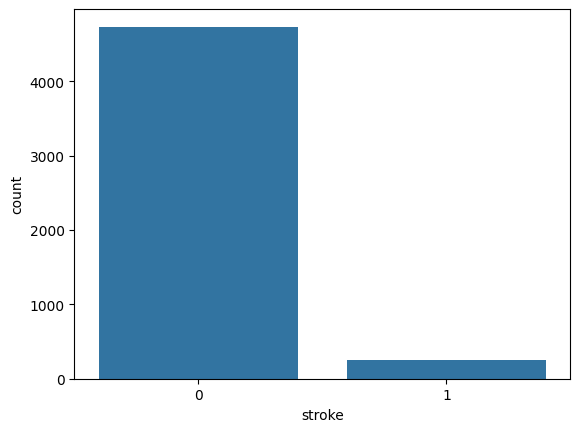

In [ ]:
sns.countplot(x = 'stroke', data = df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Setelah penjelasan tiap variabel, selanjutnya adalah informasi dari tiap variabel. Dari info diatas dapat dilihat tipe data dari dataset yaitu float, object dan integer, contohnya stroke tipe datanya integer. Kemudian jumlah data non-null dari semua variabel adalah 4981 yang mana merupakan jumlah keseluruhan data, berarti data tidak memiliki nilai null atau nilai yang kosong.

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Code diatas menunjukkan apakah dataset memiliki nilai null, dapat dilihat bahwa tidak ada nilai null/missing value yang berarti semua data tidak ada yang kosong.

In [ ]:
df.duplicated().value_counts()

False    4981
Name: count, dtype: int64

Dari code di atas dapat diketahui jumlah data yang duplicate, hasilnya adalah 0.

In [ ]:
label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df['gender'])
df["ever_married"] = label_encoder.fit_transform(df['ever_married'])
df["work_type"] = label_encoder.fit_transform(df['work_type'])
df["Residence_type"] = label_encoder.fit_transform(df['Residence_type'])
df["smoking_status"] = label_encoder.fit_transform(df['smoking_status'])
print(df)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


<Axes: >

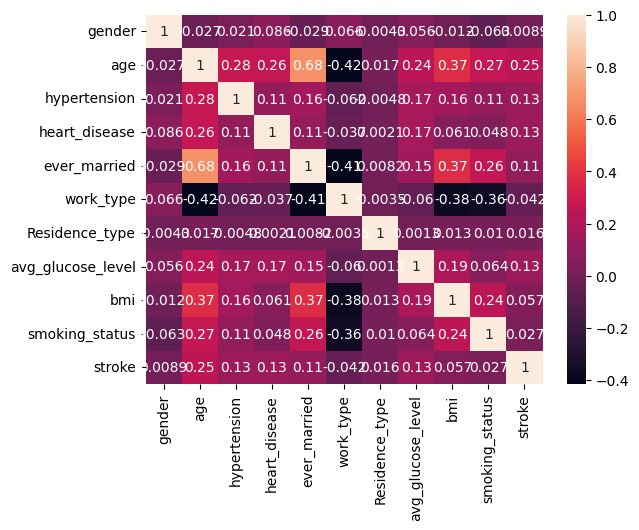

In [ ]:
sns.heatmap(data = df.corr(),annot=True)

Pada heatmap diatas, nilai di dalam setiap sel menunjukkan angka korelasi, mendekati +1 untuk korelasi positif kuat, mendekati -1 untuk korelasi negatif kuat, dan mendekati 0 untuk korelasi lemah atau tidak ada korelasi. Dari heatmap diatas, variabel yang memiliki nilai korelasi tertinggi adalah variabel bmi dengan variabel age dengan nilai korelasi 0,37. Korelasi positif sebesar ini menunjukkan bahwa terdapat hubungan antara usia (age) dan Indeks Massa Tubuh (BMI). Artinya, semakin bertambahnya usia, cenderung juga meningkatnya nilai BMI, dan sebaliknya.

In [ ]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

Variabel stroke sebagai label untuk pengklasifikasian memiliki jumlah data 4981, dimana 4733 pasien tidak mengalami penyakit stroke dan 248 pasien mengalami penyakit stroke.

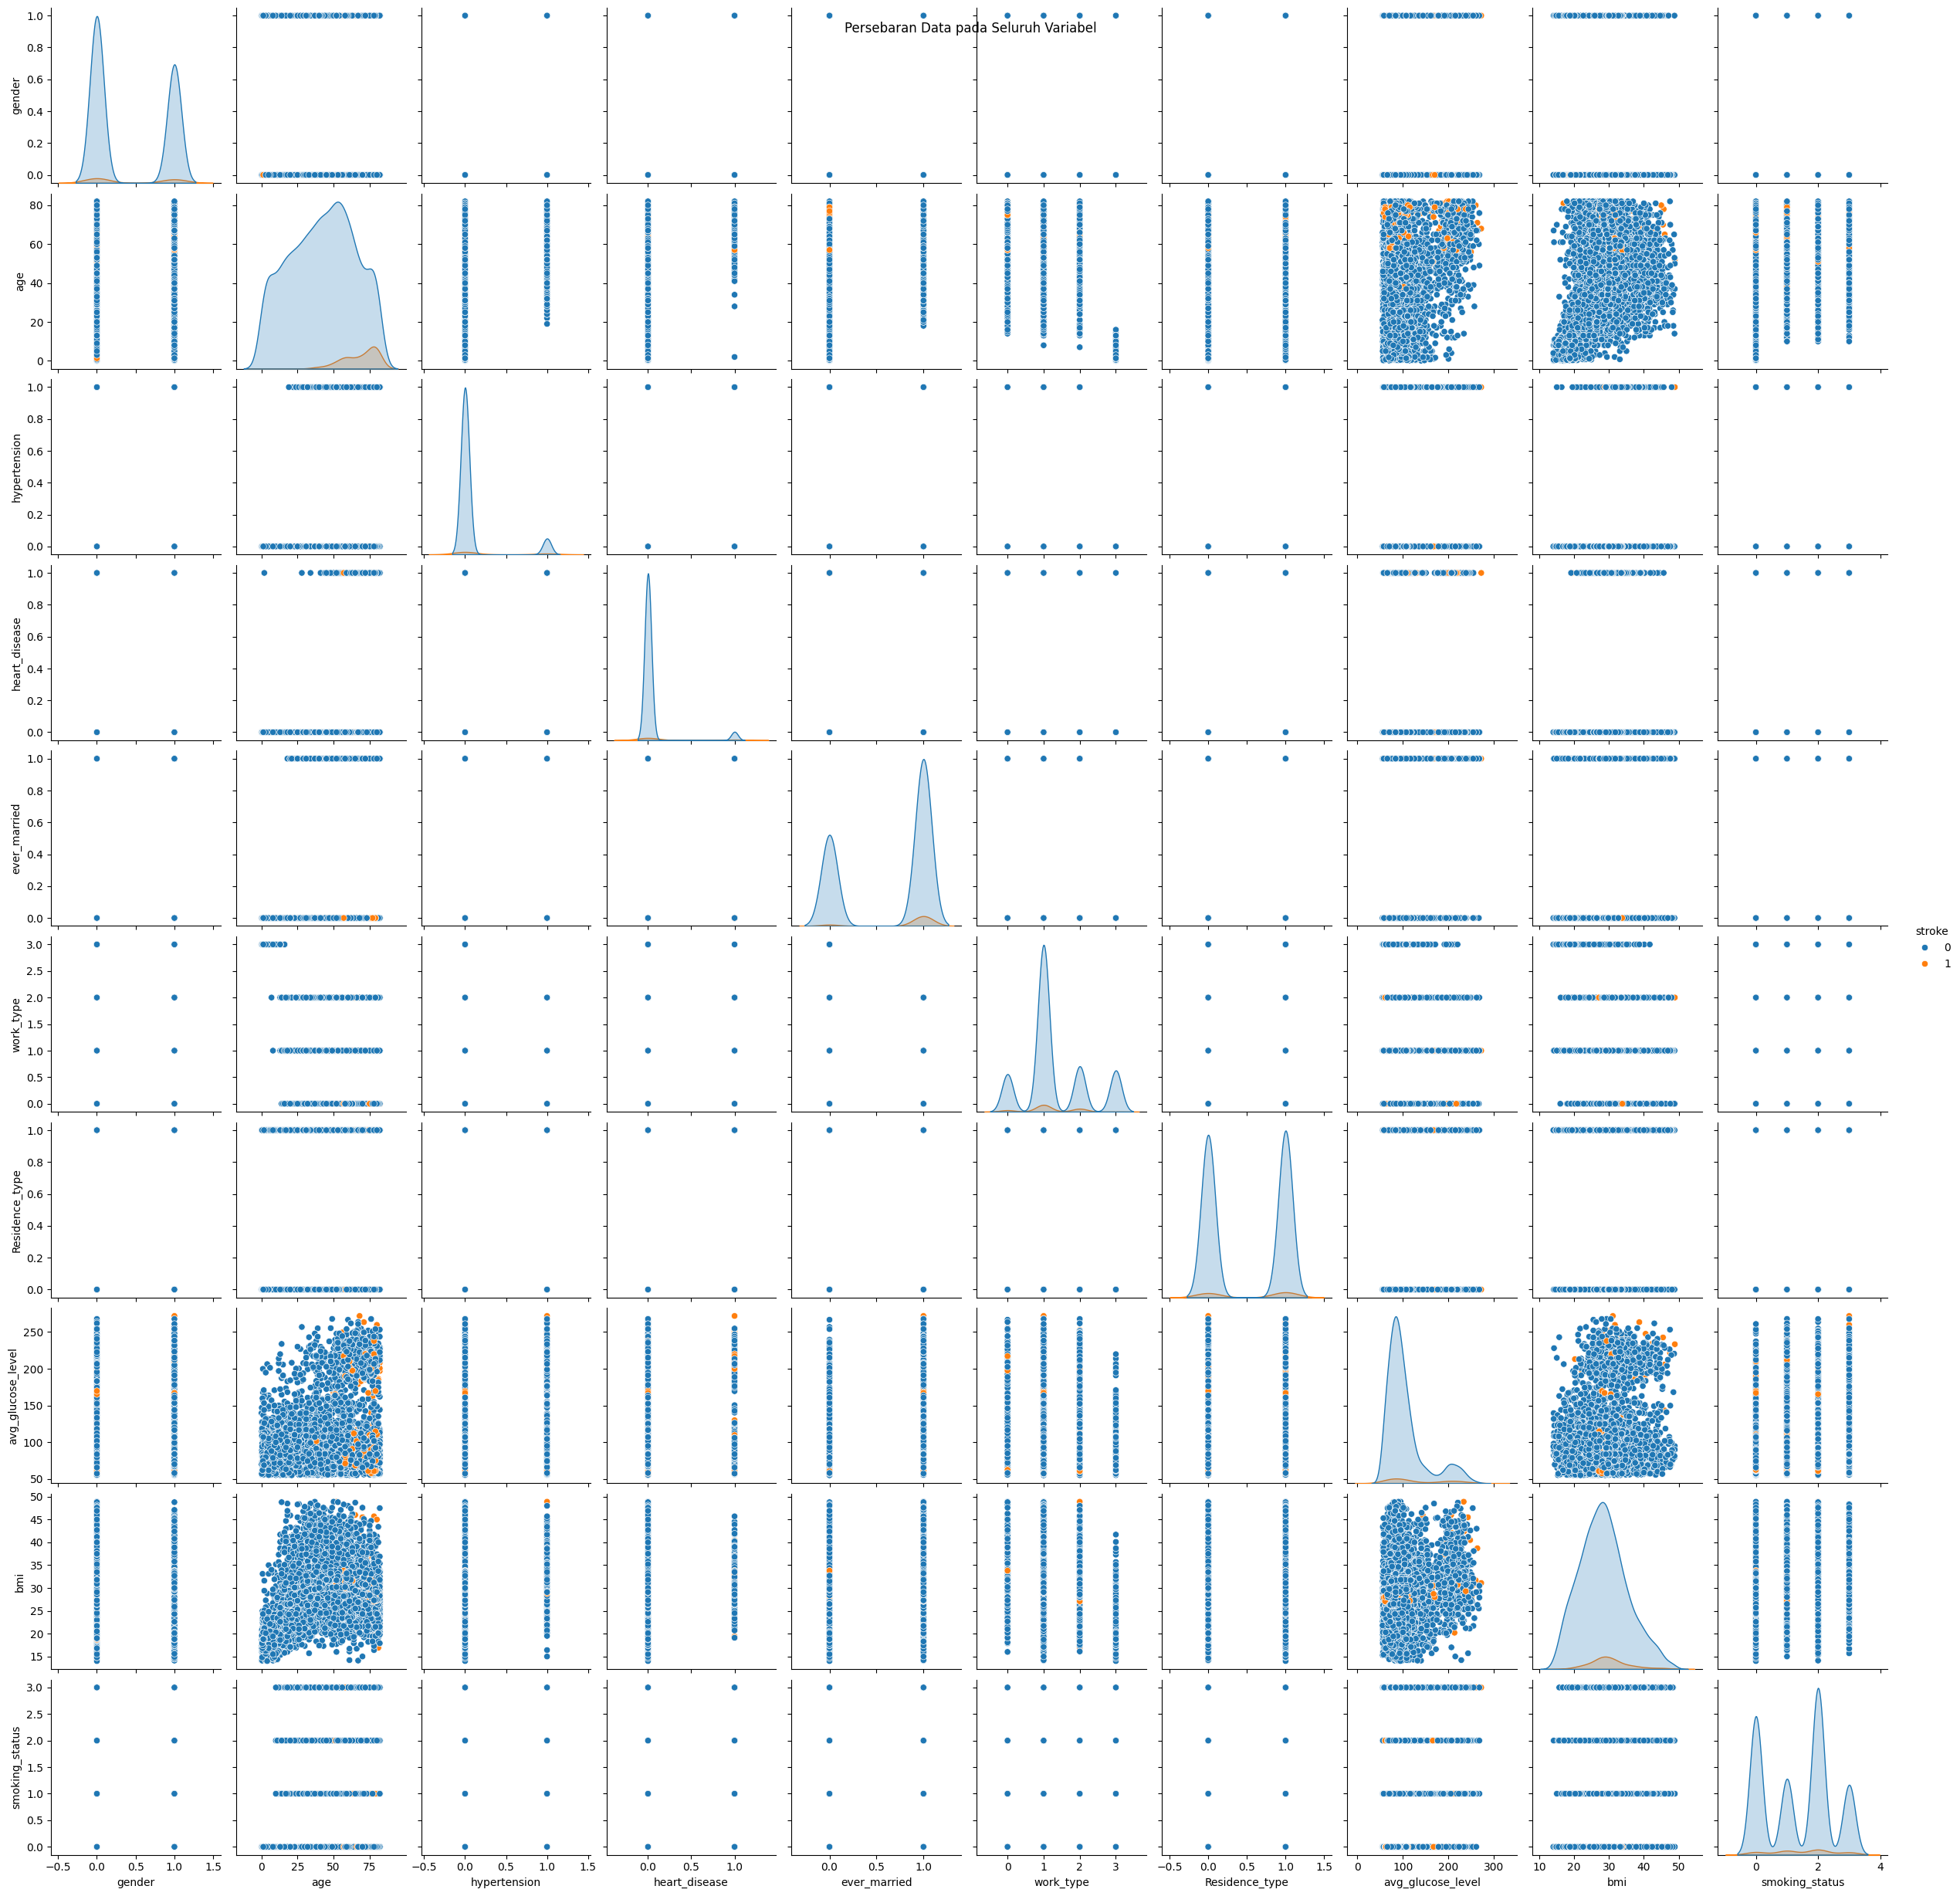

In [ ]:
sns.pairplot(df, hue = 'stroke')
plt.suptitle('Persebaran Data pada Seluruh Variabel')
plt.show()


plot diatas adalah sebaran data pada seluruh variabel terhadap variabel stroke, warna biru untuk pasien yang tidak mengalami stroke, sedangkan warna orange untuk pasien yang mengalami stroke.

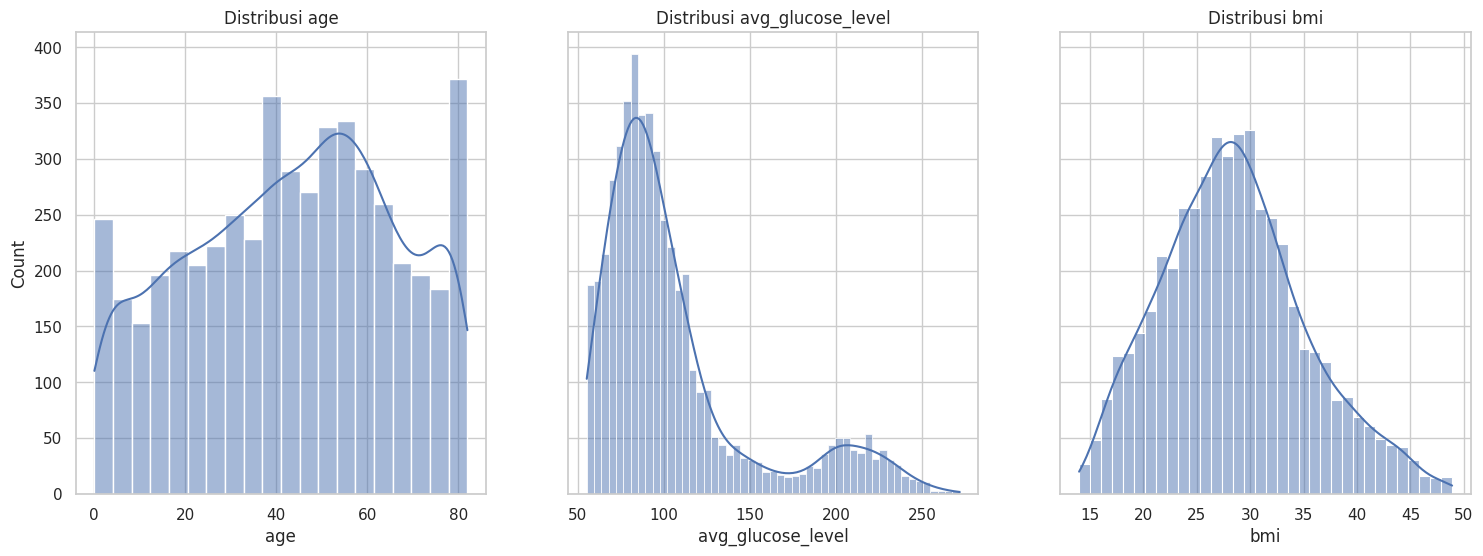

In [ ]:
selected_features = ['age', 'avg_glucose_level', 'bmi']
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for i, feature in enumerate(selected_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')
plt.show()


Untuk variabel numerik, dilihat persebaran datanya, misalnya untuk variabel age datanya tersebar dari rentang 0-80 Tahun. Untuk variabel avg_glucose_level datanya tersebar dari rentang 50-250. Untuk variabel bmi datanya tersebar dari rentang 15-50.

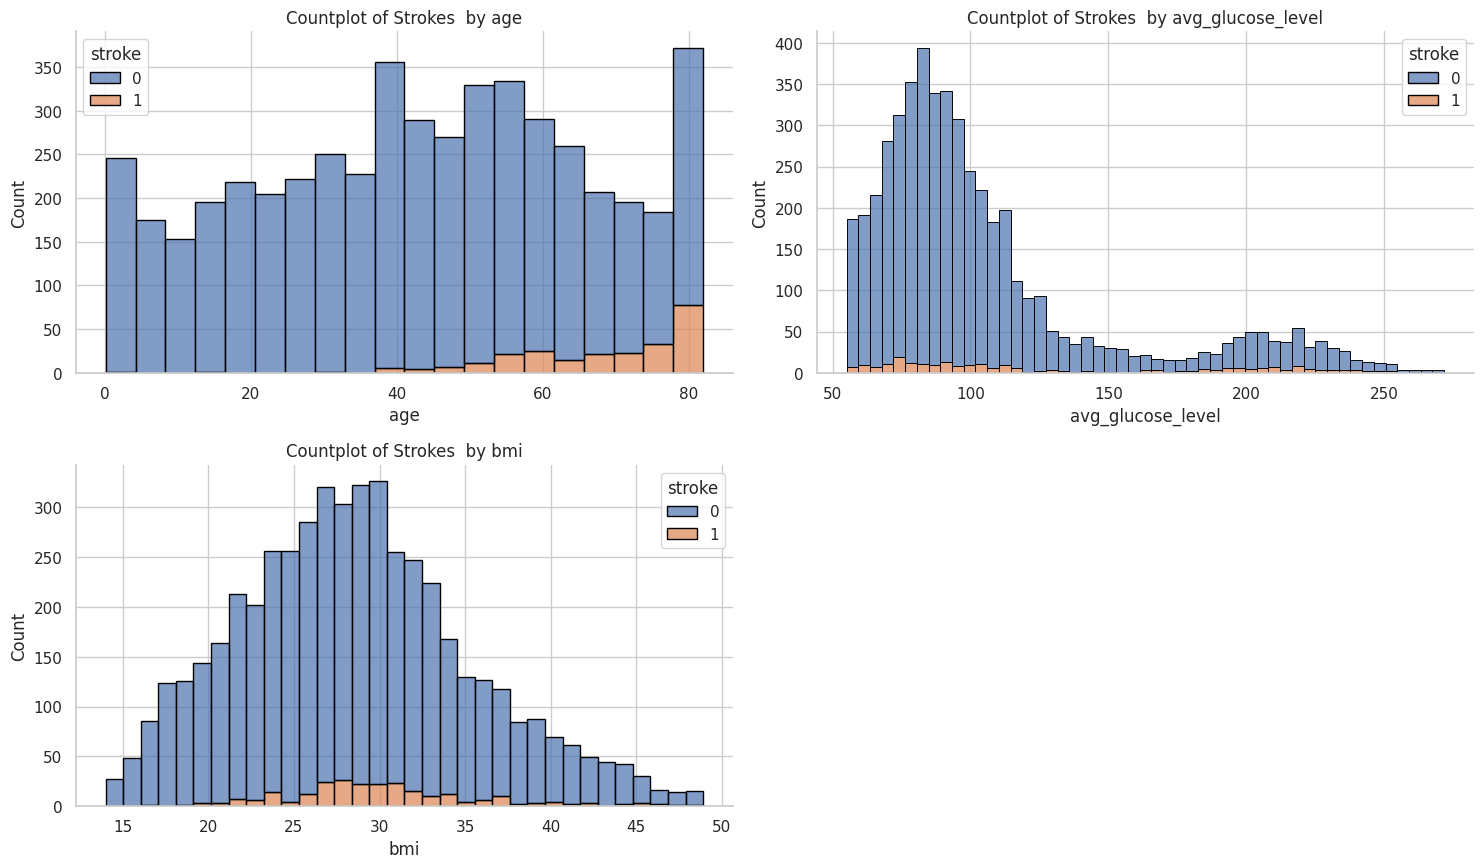

In [ ]:
plt.figure(figsize=[15,17])
fft=["age","avg_glucose_level","bmi"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.histplot(x=f, hue='stroke', edgecolor="black", alpha=0.7, multiple="stack", data=df)
    sns.despine()
    plt.title("Countplot of Strokes  by {}".format(f))
    n=n+1
plt.tight_layout()
plt.show()

Plot diatas adalah persebaran data pada variabel numerik terhadap variabel stroke, dimana warna biru untuk pasien tidak mengalami stroke dan warna orange untuk pasien yang mengalami stroke. Pada variabel age, pasien yang mengalami stroke terdapat pada rentang usia sekitar 36-80an, dimana jumlah terbanyak ada pada rentang usia 80 dengan jumlah sekitar 75 pasien. Pada variabel avg_glucose_level pasien yang mengalami stroke tersebar pada rentang 50-250 dengan jumlah yang sedikit yaitu dibawah 50 pasien. Pada variabel bmi pasien stroke tersebar pada rentang 15-50 dengan jumlah yang sedikit yaitu dibawah 5 pasien.

<h3> <b> Identifikasi Masalah Dataset </b> </h3>



Karena dataset masih mengandung variabel kategorikal, langkah pertama yang dilakukan adalah mengubahnya menjadi bentuk numerik menggunakan teknik Label Encoding. Teknik ini dipilih karena sesuai digunakan pada variabel yang bersifat ordinal, yang artinya memiliki tingkatan atau urutan yang dapat diurutkan di antara kategorinya. Sebagai contoh, variabel 'work_type' memiliki urutan tertentu seperti 'Children' < 'Private' < 'Self-employed' < 'Govt_job', sehingga penggunaan Label Encoding menjadi pilihan yang sesuai. Variabel kategorikal yang diubah yaitu gender, ever_married, work_type, Residence_type, dan smoking_status.  

In [ ]:
label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df['gender'])
df["ever_married"] = label_encoder.fit_transform(df['ever_married'])
df["work_type"] = label_encoder.fit_transform(df['work_type'])
df["Residence_type"] = label_encoder.fit_transform(df['Residence_type'])
df["smoking_status"] = label_encoder.fit_transform(df['smoking_status'])
print(df)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

**Mengatasi Outliers**

Langkah selanjutnya adalah menangani outliers, di mana setiap variabel, seperti age, avg_glucose_level, dan bmi, akan diobservasi terlebih dahulu untuk melihat persebaran datanya menggunakan box plot.

<Axes: >

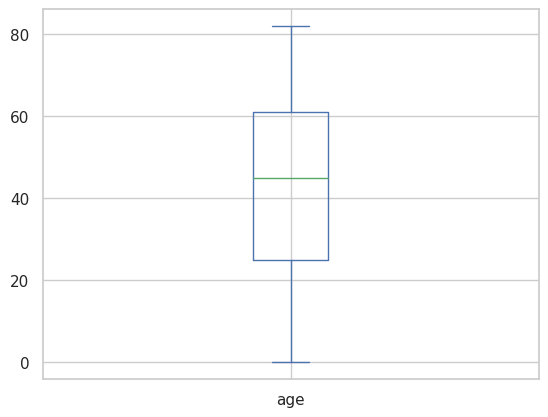

In [ ]:
df['age'].plot.box()

Pada variabel age tidak ada outliers.

<Axes: >

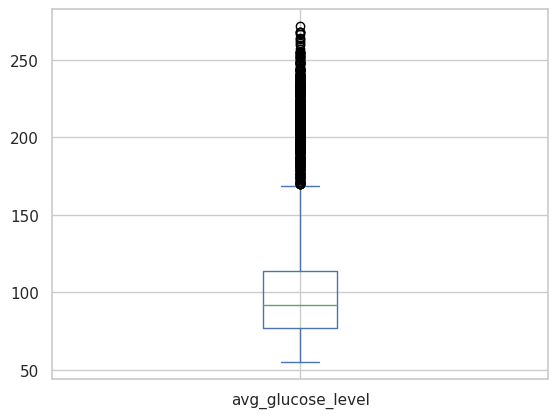

In [ ]:
df['avg_glucose_level'].plot.box()

Pada variabel avg_glucose_level terdapat banyak sekali outliers. Pertama, saya menganalisis distribusi variabel 'avg_glucose_level' terlebih dahulu, seperti Kuartil pertama (Q1), kuartil ketiga (Q3), dan interquartile range (IQR). Selanjutnya, batas bawah (bawah) dan batas atas (atas) dihitung dengan menggunakan nilai Q1, Q3, dan IQR. Batas bawah dan atas digunakan sebagai acuan untuk mengidentifikasi outliers, yang dapat memberikan wawasan tentang kemungkinan nilai ekstrem dalam variabel tersebut.

In [ ]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 = " + str(Q1))
print("Q3 = " + str(Q3))
print("IQR = " + str(IQR))
atas = Q3 + 1.5 * IQR
print("Batas Atas = " + str(atas))
bawah = Q1 - 1.5 * IQR
print("Batas Bawah = " + str(bawah))
mean = round(df["avg_glucose_level"].mean())
print(mean)


Q1 = 77.23
Q3 = 113.86
IQR = 36.629999999999995
Batas Atas = 168.805
Batas Bawah = 22.28500000000001
106


- Q1 adalah nilai yang membagi 25% data terendah dari variabel
- Q3 adalah nilai yang membagi 75% data terendah dari variabel
- IQR adalah rentang antara kuartil ketiga (Q3) dan kuartil pertama (Q1). Dihitung sebagai selisih Q3 - Q1.
- Batas bawah (bawah) dan batas atas (atas) digunakan untuk mengidentifikasi nilai-nilai ekstrem atau outliers.

Dalam analisis ini, setelah memperoleh nilai tersebut, batas bawahnya terukur sebesar 22.29, namun nilai terendah dalam distribusi variabel adalah 55.5. Dengan demikian, tidak ada outliers di bawah batas bawah. Sementara itu, batas atas tercatat sebesar 168.805, dan dalam distribusi variabel terdapat banyak nilai yang melebihi angka ini, menunjukkan keberadaan sejumlah outliers di atas batas atas. Oleh karena itu, outliers atau nilai di luar rentang bawah hingga atas akan diubah menjadi nilai rata-rata (mean) seperti dibawah ini.

<Axes: >

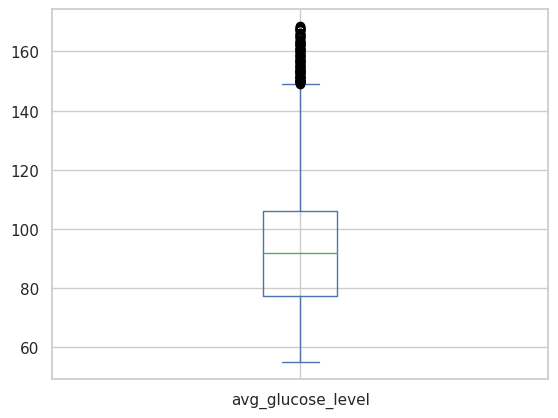

In [ ]:
for i in df.index:
    if(df.loc[i]["avg_glucose_level"] > atas):
        df.loc[i, "avg_glucose_level"] = mean
df['avg_glucose_level'].plot.box()

Dapat dilihat hasil dari handle outliers pada variabel avg_glucose_level. Dimana outliersnya berkurang karena nilai yang melebihi batas atas sudah diubah menjadi mean dan nilai max pada variabel ini yang awalnya 271.74 menjadi 168.8

<Axes: >

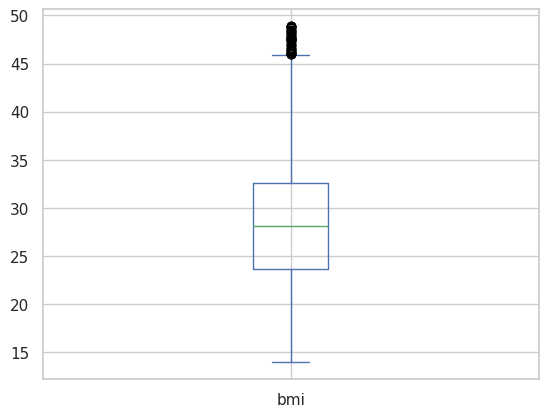

In [ ]:
df['bmi'].plot.box()

Selanjutnya adalah variabel bmi, sama seperti sebelumnya, saya menganalisis distribusi variabel 'bmi' terlebih dahulu, seperti Kuartil pertama (Q1), kuartil ketiga (Q3), dan interquartile range (IQR). Selanjutnya, batas bawah (bawah) dan batas atas (atas) dihitung dengan menggunakan nilai Q1, Q3, dan IQR. Batas bawah dan atas digunakan sebagai acuan untuk mengidentifikasi outliers, yang dapat memberikan wawasan tentang kemungkinan nilai ekstrem dalam variabel tersebut.

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 = " + str(Q1))
print("Q3 = " + str(Q3))
print("IQR = " + str(IQR))
atas = Q3 + 1.5 * IQR
print("Batas Atas = " + str(atas))
bawah = Q1 - 1.5 * IQR
print("Batas Bawah = " + str(bawah))
mean = round(df["bmi"].mean())
print("Mean = " + str(mean))

Q1 = 23.7
Q3 = 32.6
IQR = 8.900000000000002
Batas Atas = 45.95
Batas Bawah = 10.349999999999996
Mean = 28


<Axes: >

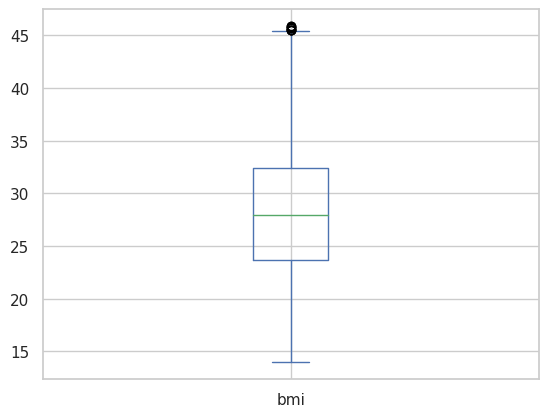

In [ ]:
for i in df.index:
    if(df.loc[i]["bmi"] > atas):
        df.loc[i, "bmi"] = mean
df['bmi'].plot.box()

Dapat dilihat outliers nya tersisa sedikit dibandingkan tadi.

**Pisahkan Fitur dan Label**

Memisahkan fitur dan label dilakukan dengan mengidentifikasi variabel-variabel yang akan dijadikan fitur, yaitu semua variabel kecuali 'stroke', yang akan dijadikan label. Variabel 'stroke' akan menjadi target dalam tugas klasifikasi.

In [ ]:
fitur=df.drop(["stroke"],axis=1)
fitur.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,106.00,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,106.00,34.4,3
3,0,79.0,1,0,1,2,0,106.00,24.0,2
4,1,81.0,0,0,1,1,1,106.00,29.0,1


In [ ]:
label=df["stroke"]
label.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

**Bagi data train dan data test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.2, random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (3984, 10)
y_train shape: (3984,)
X_test shape: (997, 10)
y_test shape: (997,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.2, random_state=0, shuffle=True, stratify=label)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (3984, 10)
y_train shape: (3984,)
X_test shape: (997, 10)
y_test shape: (997,)


Saya membagi data dengan format 80% data train dan 20% data test. random_state=0 adalah nilai seed yang digunakan untuk menginisialisasi generator angka acak. Ketika menggunakan nilai seed yang sama (dalam hal ini, 0), maka akan mendapatkan pembagian data yang sama setiap kali menjalankan fungsi tersebut.

**Normalisasi Data**

Kemudian dilakukan normalisasi data dengan bantuan StandardScaler. Normalisasi membantu memastikan bahwa setiap variabel memberikan kontribusi yang seimbang dalam perhitungan jarak, dan tidak ada variabel yang mendominasi hanya karena skala yang lebih besar.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pemilihan Model


**Supervised Learning (Klasifikasi)**

Saya memilih supervised learning karena fokus pada pengklasifikasian, dan dataset yang saya gunakan sudah memiliki output yang telah dilabeli. Dalam supervised learning, model diajarkan untuk memahami hubungan antara input (fitur) dan output (label) dengan menggunakan dataset yang sudah memiliki pasangan input-output yang telah dilabeli.

Model yang saya terapkan adalah K-Nearest Neighbors untuk melakukan klasifikasi. Di bawah ini terdapat flowchart dan arsitektur model yang digunakan.

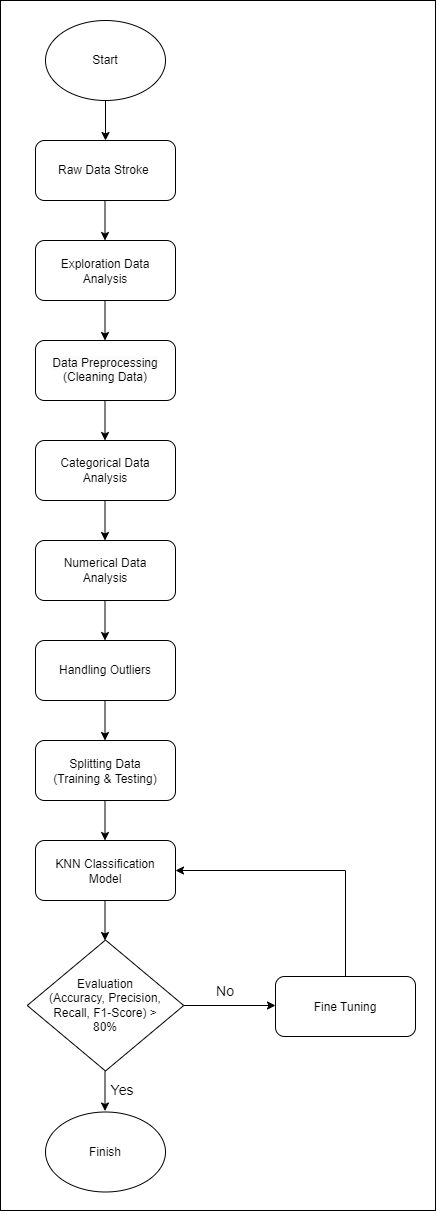

In [ ]:
from IPython.display import Image
Image("flowchartt.png")

Pada tahap splitting data, saya membagi data menjadi dua bagian, yaitu 80% data untuk pelatihan (training) dan 20% data untuk pengujian (testing).

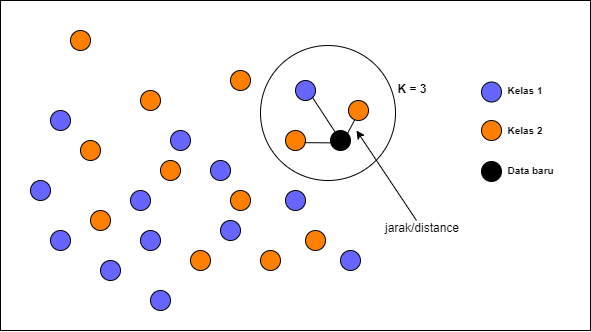

In [ ]:
Image("arsitektur.png")

Ada sejumlah data point yang terbagi menjadi dua kelas yaitu Kelas 1 (ungu) dan Kelas 2 (orange). Misalnya ada data baru (hitam) yang akan diklasifikasi kelasnya menggunakan algoritma KNN. Dari gambar di atas, nilai K yang digunakan adalah 3. Setelah dihitung jarak antara titik hitam ke masing-masing data point lainnya, didapatkan 3 titik terdekat yang terdiri dari 2 titik orange dan satu titik ungu seperti yang diilustrasikan di dalam lingkaran, maka kelas untuk data baru (titik hitam) adalah Kelas 2 (orange).

# Pelatihan dan Validasi Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, recall_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)

# Melatih model KNN pada data train
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

knn = KNeighborsClassifier(n_neighbors=100): Baris ini membuat objek model KNN dengan menyertakan parameter n_neighbors=100. Parameter n_neighbors=100 mengatur jumlah tetangga terdekat yaitu 100.

knn.fit(X_train, y_train): Baris ini merupakan langkah pelatihan (training) sebenarnya. Fungsi fit digunakan untuk melatih model dengan data pelatihan. X_train adalah matriks fitur dari data pelatihan, dan y_train berisi label kelas yang sesuai dengan setiap baris data di X_train. Dengan memanggil fit, model belajar dari data pelatihan untuk kemudian dapat digunakan untuk membuat klasifikasi.

In [ ]:
# Melakukan prediksi pada data test
y_pred = knn.predict(X_test)

# Menghitung dan mencetak akurasi model KNN
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print("Akurasi dengan K-NN: {0:.2f}%".format(accuracy))

Akurasi dengan K-NN: 94.98%


y_pred = knn.predict(X_test): Baris ini digunakan untuk melakukan prediksi kelas pada data uji (X_test) menggunakan model KNN yang telah dilatih sebelumnya. Hasil prediksi disimpan dalam variabel y_pred.

accuracy = metrics.accuracy_score(y_test, y_pred) * 100: Baris ini menghitung akurasi model KNN dengan membandingkan label kelas sebenarnya (y_test) dengan hasil prediksi (y_pred). Fungsi accuracy_score digunakan untuk mengukur akurasi. Hasil akurasi dikalikan dengan 100 untuk mendapatkan nilai dalam persentase, dan nilai tersebut disimpan dalam variabel accuracy.

Sehingga didapatkan nilai akurasi yaitu 94.98%.

In [ ]:
# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:")
print(classification_rep)

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_rep = classification_report(y_test, y_pred): Baris ini menggunakan fungsi classification_report untuk menghasilkan laporan klasifikasi. Fungsi ini memerlukan dua argumen: y_test yang berisi label kelas sebenarnya dari data uji, dan y_pred yang berisi hasil prediksi dari model.





Laporan klasifikasi ini memberikan gambaran menyeluruh tentang kinerja model KNN pada masing-masing kelas. Dalam hal ini, terdapat tantangan signifikan dalam memprediksi kelas 1, seperti yang tercermin dari nilai precision, recall, dan F1-Score yang rendah untuk kelas tersebut.

# Optimasi Model dan Fine Tunning

Pada Optimasi Hyperparameter, saya menggunakan 2 Algoritma yaitu KNN yang merupakan algoritma utama saya dan Random Forest yang merupakan algoritma tambahan untuk dilakukan pembandingan. Pada masing-masing Algoritma, saya membuat 5 Model yaitu model pertama tidak menggunakan parameter, dan 4 model lainnya menggunakan parameter yang nilainya diubah-ubah.

### **Algoritma KNN**

Pada Algoritma KNN, saya menggunakan 3 parameter yaitu :    

1.   n_neighbors : Parameter yang menentukan jumlah tetangga terdekat yang akan digunakan dalam pemodelan. Semakin banyak tetangga yang dipertimbangkan, semakin rumit modelnya.
2.   algorithm : Parameter yang digunakan untuk menghitung tetangga terdekat. Beberapa pilihan termasuk **'brute', 'ball_tree', 'kd_tree', atau 'auto'**.
3. metric: Parameter ini menentukan metrik jarak yang digunakan untuk mengukur kedekatan antara data point. Beberapa pilihan metrik yang digunakan termasuk **'minkowski', 'euclidean' atau 'manhattan'**.





**Model 1 KNN**

In [ ]:
# Membuat model klasifikasi KNN tanpa parameter (Model 1)
knn1 = KNeighborsClassifier()

In [ ]:
# Training data pada Model 1
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Menampilkan metrics evaluasinya
y_hat1 = knn1.predict(X_train)
y_knn1 = knn1.predict(X_test)
print('Akurasi Data Train Model 1 KNN : ', metrics.accuracy_score(y_train, y_hat1))
print('Akurasi Data Test Model 1 KNN : ',metrics.accuracy_score(y_test, y_knn1))
print('\nClassification Report Model 1 KNN : \n\n',classification_report(y_test, y_knn1))

Akurasi Data Train Model 1 KNN :  0.9508032128514057
Akurasi Data Test Model 1 KNN :  0.9468405215646941

Classification Report Model 1 KNN : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.20      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.58      0.51      0.50       997
weighted avg       0.91      0.95      0.93       997



**Model 2 KNN**

In [ ]:
# Membuat model klasifikasi KNN dengan parameter (Model 2)
knn2 = KNeighborsClassifier(n_neighbors = 100, algorithm = 'brute',metric = 'minkowski')

In [ ]:
# Training data pada Model 2
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=100)

In [ ]:
# Menampilkan metrics evaluasinya
y_hat2 = knn2.predict(X_train)
y_knn2 = knn2.predict(X_test)
print('Akurasi Data Train Model 2 KNN : ', metrics.accuracy_score(y_train, y_hat2))
print('Akurasi Data Test Model 2 KNN : ',metrics.accuracy_score(y_test, y_knn2))
print('\nClassification Report Model 2 KNN : \n\n',classification_report(y_test, y_knn2))

Akurasi Data Train Model 2 KNN :  0.9503012048192772
Akurasi Data Test Model 2 KNN :  0.9498495486459378

Classification Report Model 2 KNN : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model 3 KNN**

In [ ]:
# Membuat model klasifikasi KNN dengan parameter (Model 3)
knn3 = KNeighborsClassifier(n_neighbors = 10, algorithm = 'ball_tree',metric = 'euclidean')

In [ ]:
# Training data pada Model 3
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=10)

In [ ]:
# Menampilkan metrics evaluasinya
y_hat3 = knn3.predict(X_train)
y_knn3 = knn3.predict(X_test)
print('Akurasi Data Train Model 3 KNN : ', metrics.accuracy_score(y_train, y_hat3))
print('Akurasi Data Test Model 3 KNN : ',metrics.accuracy_score(y_test, y_knn3))
print('\nClassification Report Model 3 KNN : \n\n',classification_report(y_test, y_knn3))

Akurasi Data Train Model 3 KNN :  0.9503012048192772
Akurasi Data Test Model 3 KNN :  0.9488465396188566

Classification Report Model 3 KNN : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997



**Model 4 KNN**

In [ ]:
# Membuat model klasifikasi KNN dengan parameter (Model 4)
knn4 = KNeighborsClassifier(n_neighbors = 50, algorithm = 'kd_tree',metric = 'manhattan')

In [ ]:
# Training data pada Model 4
knn4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=50)

In [ ]:
# Menampilkan metrics evaluasinya
y_hat4 = knn4.predict(X_train)
y_knn4 = knn4.predict(X_test)
print('Akurasi Data Train Model 4 KNN : ', metrics.accuracy_score(y_train, y_hat4))
print('Akurasi Data Test Model 4 KNN : ',metrics.accuracy_score(y_test, y_knn4))
print('\nClassification Report Model 4 KNN : \n\n',classification_report(y_test, y_knn4))

Akurasi Data Train Model 4 KNN :  0.9503012048192772
Akurasi Data Test Model 4 KNN :  0.9498495486459378

Classification Report Model 4 KNN : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model 5 KNN**

In [ ]:
# Membuat model klasifikasi KNN dengan parameter (Model 5)
knn5 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto',metric = 'euclidean')

In [ ]:
# Training data pada Model 5
knn5.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Menampilkan metrics evaluasinya
y_hat5 = knn5.predict(X_train)
y_knn5 = knn5.predict(X_test)
print('Akurasi Data Train Model 5 KNN : ', metrics.accuracy_score(y_train, y_hat5))
print('Akurasi Data Test Model 5 KNN : ',metrics.accuracy_score(y_test, y_knn5))
print('\nClassification Report Model 5 KNN : \n\n',classification_report(y_test, y_knn5))

Akurasi Data Train Model 5 KNN :  0.9508032128514057
Akurasi Data Test Model 5 KNN :  0.9468405215646941

Classification Report Model 5 KNN : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.20      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.58      0.51      0.50       997
weighted avg       0.91      0.95      0.93       997



In [ ]:
# Rangkuman hasil akurasi Model KNN
print('Akurasi Model 1 KNN : ',metrics.accuracy_score(y_test, y_knn1))
print('Akurasi Model 2 KNN : ',metrics.accuracy_score(y_test, y_knn2))
print('Akurasi Model 3 KNN : ',metrics.accuracy_score(y_test, y_knn3))
print('Akurasi Model 4 KNN : ',metrics.accuracy_score(y_test, y_knn4))
print('Akurasi Model 5 KNN : ',metrics.accuracy_score(y_test, y_knn5))

Akurasi Model 1 KNN :  0.9468405215646941
Akurasi Model 2 KNN :  0.9498495486459378
Akurasi Model 3 KNN :  0.9488465396188566
Akurasi Model 4 KNN :  0.9498495486459378
Akurasi Model 5 KNN :  0.9468405215646941


Hasil akurasi dari 5 model KNN yang telah dibuat, dapat disimpulkan bahwa model yang memiliki akurasi terbaik yaitu model 2 dan 4 yang memiliki nilai yang sama yaitu 0.9498495486459378. Pada model 2 menggunakan parameter n_neighbors = 100, algorithm = 'brute',metric = 'minkowski' dan pada model 4 menggunakan parameter n_neighbors = 50, algorithm = 'kd_tree',metric = 'manhattan'. Untuk hasil classification report pada model 2 dan 4 juga sama, dapat dilihat seperti dibawah ini :    

In [ ]:
print('\nClassification Report Model 2 KNN : \n\n',classification_report(y_test, y_knn2))
print('\nClassification Report Model 4 KNN : \n\n',classification_report(y_test, y_knn4))


Classification Report Model 2 KNN : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997


Classification Report Model 4 KNN : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

### **Algoritma Random Forest (RF)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Pada Algoritma RF, saya menggunakan 3 parameter yaitu :  


1. n_estimators: Merupakan jumlah pohon keputusan yang akan dibuat dalam ensemble Random Forest. Semakin banyak pohon yang digunakan, semakin baik kemungkinan model untuk menggeneralisasi data, tetapi juga akan meningkatkan waktu komputasi.
2. max_depth: Merupakan kedalaman maksimum dari setiap pohon dalam ensemble. Mengatur nilai ini dapat membantu mengontrol kompleksitas model dan mencegah overfitting.
3. min_samples_leaf: Merupakan jumlah sampel minimum yang diperlukan untuk menjadi leaf node. Mengatur nilai ini dapat membantu mencegah splitting yang terlalu detail dan membantu mengurangi overfitting.



**Model 1 RF**

In [ ]:
# Membuat model klasifikasi RF tanpa parameter (Model 1)
rf1 = RandomForestClassifier()

In [ ]:
# Training data pada model 1
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Menampilkan metrics evaluasinya
y_rs1 = rf1.predict(X_train)
y_rf1 = rf1.predict(X_test)
print('Akurasi Data Train Model 1 RF : ', metrics.accuracy_score(y_train, y_rs1))
print('Akurasi Data Test Model 1 RF : ',metrics.accuracy_score(y_test, y_rf1))
print('\nClassification Report Model 1 RF : \n\n',classification_report(y_test, y_rf1))

Akurasi Data Train Model 1 RF :  1.0
Akurasi Data Test Model 1 RF :  0.9478435305917753

Classification Report Model 1 RF : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997



**Model 2 RF**

In [ ]:
# Membuat model klasifikasi RF dengan parameter (Model 2)
rf2 = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_leaf=4)

In [ ]:
# Training data pada model 2
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=150)

In [ ]:
# Menampilkan metrics evaluasinya
y_rs2 = rf2.predict(X_train)
y_rf2 = rf2.predict(X_test)
print('Akurasi Data Train Model 2 RF : ', metrics.accuracy_score(y_train, y_rs2))
print('Akurasi Data Test Model 2 RF : ',metrics.accuracy_score(y_test, y_rf2))
print('\nClassification Report Model 2 RF : \n\n',classification_report(y_test, y_rf2))

Akurasi Data Train Model 2 RF :  0.9505522088353414
Akurasi Data Test Model 2 RF :  0.9498495486459378

Classification Report Model 2 RF : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model 3 RF**

In [ ]:
# Membuat model klasifikasi RF dengan parameter (Model 3)
rf3 = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_leaf=10)

In [ ]:
# Training data pada model 3
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=1000)

In [ ]:
# Menampilkan metrics evaluasinya
y_rs3 = rf3.predict(X_train)
y_rf3 = rf3.predict(X_test)
print('Akurasi Data Train Model 3 RF : ', metrics.accuracy_score(y_train, y_rs3))
print('Akurasi Data Test Model 3 RF : ',metrics.accuracy_score(y_test, y_rf3))
print('\nClassification Report Model 3 RF : \n\n',classification_report(y_test, y_rf3))

Akurasi Data Train Model 3 RF :  0.9503012048192772
Akurasi Data Test Model 3 RF :  0.9498495486459378

Classification Report Model 3 RF : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model 4 RF**

In [ ]:
# Membuat model klasifikasi RF dengan parameter (Model 4)
rf4 = RandomForestClassifier(n_estimators=2000, max_depth=10, min_samples_leaf=2)

In [ ]:
# Training data pada model 4
rf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=2000)

In [ ]:
# Menampilkan metrics evaluasinya
y_rs4 = rf4.predict(X_train)
y_rf4 = rf4.predict(X_test)
print('Akurasi Data Train Model 4 RF : ', metrics.accuracy_score(y_train, y_rs4))
print('Akurasi Data Test Model 4 RF : ',metrics.accuracy_score(y_test, y_rf4))
print('\nClassification Report Model 4 RF : \n\n',classification_report(y_test, y_rf4))

Akurasi Data Train Model 4 RF :  0.9545682730923695
Akurasi Data Test Model 4 RF :  0.9498495486459378

Classification Report Model 4 RF : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model 5 RF**

In [ ]:
# Membuat model klasifikasi RF dengan parameter (Model 5)
rf5 = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10)

In [ ]:
# Training data pada model 5
rf5.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10)

In [ ]:
# Menampilkan metrics evaluasinya
y_rs5 = rf5.predict(X_train)
y_rf5 = rf5.predict(X_test)
print('Akurasi Data Train Model 5 RF : ', metrics.accuracy_score(y_train, y_rs5))
print('Akurasi Data Test Model 5 RF : ',metrics.accuracy_score(y_test, y_rf5))
print('\nClassification Report Model 5 RF : \n\n',classification_report(y_test, y_rf5))

Akurasi Data Train Model 5 RF :  0.9503012048192772
Akurasi Data Test Model 5 RF :  0.9498495486459378

Classification Report Model 5 RF : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Akurasi Model 1 RF : ',metrics.accuracy_score(y_test, y_rf1))
print('Akurasi Model 2 RF : ',metrics.accuracy_score(y_test, y_rf2))
print('Akurasi Model 3 RF : ',metrics.accuracy_score(y_test, y_rf3))
print('Akurasi Model 4 RF : ',metrics.accuracy_score(y_test, y_rf4))
print('Akurasi Model 5 RF : ',metrics.accuracy_score(y_test, y_rf5))

Akurasi Model 1 RF :  0.9478435305917753
Akurasi Model 2 RF :  0.9498495486459378
Akurasi Model 3 RF :  0.9498495486459378
Akurasi Model 4 RF :  0.9498495486459378
Akurasi Model 5 RF :  0.9498495486459378


Hasil akurasi pada 5 model RF yang telah dibuat, dapat dilihat bahwa nilai akurasi yang terbaik yaitu model 2 sampai model 5 memiliki nilai akurasi yang sama sebesar 0.9498495486459378. Model 2 sampai 5 menggunakan parameter yang nilainya diubah-ubah. Untuk hasil classification reportnya juga sama.

# Interpretasi dan Visualisasi Hasil

Pada penyelesaian tugas ini menggunakan metode KNN 1 karena model KNN 1 memiliki nilai akurasi yang baik, metode KNN melakukan klasifikasi pada penyakit Stroke menjadi dua kelas yaitu Stroke dan Tidak Stroke. Disini model menghasilkan akurasi sebesar ini :

In [ ]:
# Model KNN 1
knn1 = KNeighborsClassifier()
# Training data pada Model 1
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Menampilkan metrics evaluasinya
y_hat1 = knn1.predict(X_train)
y_knn1 = knn1.predict(X_test)
print('Akurasi Data Train Model 1 KNN : ', metrics.accuracy_score(y_train, y_hat1))
print('Akurasi Data Test Model 1 KNN : ',metrics.accuracy_score(y_test, y_knn1))
print('\nClassification Report Model 1 KNN : \n\n',classification_report(y_test, y_knn1))

Akurasi Data Train Model 1 KNN :  0.9508032128514057
Akurasi Data Test Model 1 KNN :  0.9468405215646941

Classification Report Model 1 KNN : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.20      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.58      0.51      0.50       997
weighted avg       0.91      0.95      0.93       997



Dari hasil akurasi dan klasifikasi report diatas, dapat dilihat bahwa kelas 0 yaitu (Tidak Stroke) memiliki rata-rata nilai presisi, recall, dan f1-score yang lebih besar daripada kelas 1 (Stroke).

**Confusion Matrix**

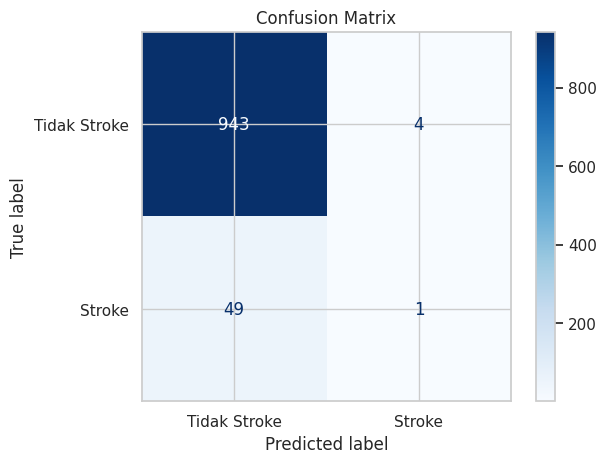

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_knn1)
class_names = ['Tidak Stroke', 'Stroke']

# Plot confusion matrix dengan menampilkan nama kelas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Dalam kasus ini, model memiliki dua kelas yaitu: "Tidak Stroke" dan "Stroke". Berikut adalah penjelasan confusion matrix untuk kelas tersebut:

- True Positives(TP) =  943, artinya 943 data tergolong dalam kelas Tidak Stroke dan diprediksi benar oleh model sebagai Tidak Stroke.

- True Negatives(TN) =  1, artinya 1 data tergolong dalam kelas Stroke dan diprediksi benar oleh model sebagai Stroke.

- False Positives(FP) =  4, artinya 4 data tergolong dalam kelas Tidak Stroke dan diprediksi salah oleh model sebagai Stroke.

- False Negatives(FN) =  49, artinya 49 data tergolong dalam kelas Stroke dan diprediksi salah oleh model sebagai Tidak Stroke.

Dari hasil confusion matrix diatas terdapat kelemahan model yaitu ada 49 data yang sebenarnya adalah "Stroke", tetapi model tidak berhasil memprediksi mereka sebagai "Stroke".

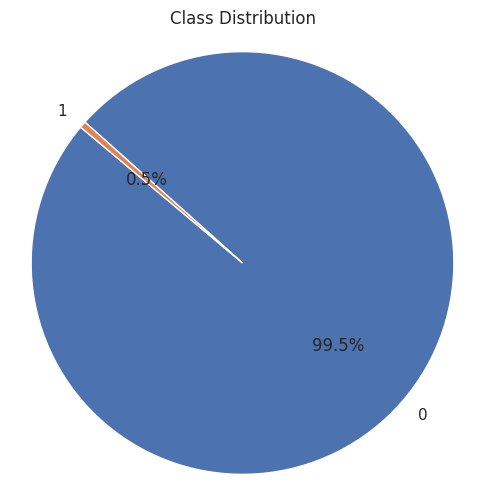

In [ ]:
# Plot pie chart Persebaran data pada tiap kelasnya dari hasil klasifikasi yang dibuat
unique_classes, class_counts = np.unique(y_knn1, return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=unique_classes, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

Pie chart tersebut adalah hasil dari klasifikasi menggunakan model KNN (K-Nearest Neighbors), yang menunjukkan distribusi kelas dari hasil prediksi model tersebut. Dari plot tersebut, terlihat bahwa sebagian besar data diklasifikasikan sebagai "Tidak Stroke" (99,5%), sementara hanya sebagian kecil diklasifikasikan sebagai "Stroke" (0,5%). Hal ini memberikan wawasan tentang kinerja model KNN dalam memprediksi kelas-kelas yang berbeda dalam dataset, serta menyoroti ketidakseimbangan yang signifikan antara kelas "Tidak Stroke" dan "Stroke".

**Histogram Probabilitas dari dua kelas**

In [ ]:
y_pred_prob = knn1.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probabilitas Tidak Stroke (0)', 'Probabilitas stroke (1)'])
y_pred_prob_df

,Probabilitas Tidak Stroke (0),Probabilitas stroke (1)
0,0.8,0.2
1,0.8,0.2
2,0.6,0.4
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Text(0, 0.5, 'Frekuensi')

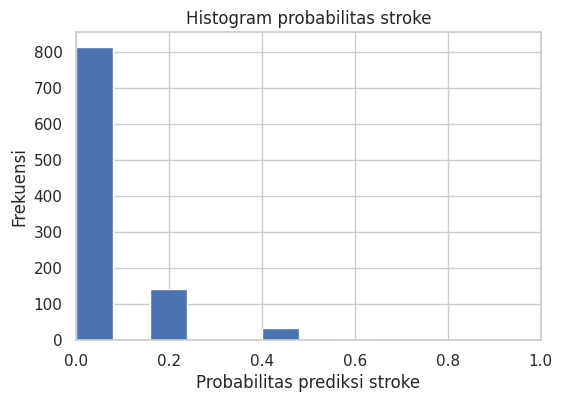

In [ ]:
y_pred_2 = knn1.predict_proba(X_test)[:, 1]
plt.figure(figsize=(6,4))
plt.rcParams['font.size'] = 12
plt.hist(y_pred_2, bins = 10)
plt.title('Histogram probabilitas stroke')
plt.xlim(0,1)
plt.xlabel('Probabilitas prediksi stroke')
plt.ylabel('Frekuensi')

Dari histogram ini, dapat dilihat distribusi probabilitas prediksi stroke pada data pengujian. Rentang probabilitas berkisar dari 0 hingga 1, di mana 0 menunjukkan probabilitas rendah bahwa seseorang akan mengalami stroke, sedangkan 1 menunjukkan probabilitas tinggi bahwa seseorang akan mengalami stroke.


Pada histogram ini, sebagian besar probabilitas berpusat di sekitar nilai rendah (dekat 0), maka model cenderung memprediksi bahwa kebanyakan individu tidak akan mengalami stroke.

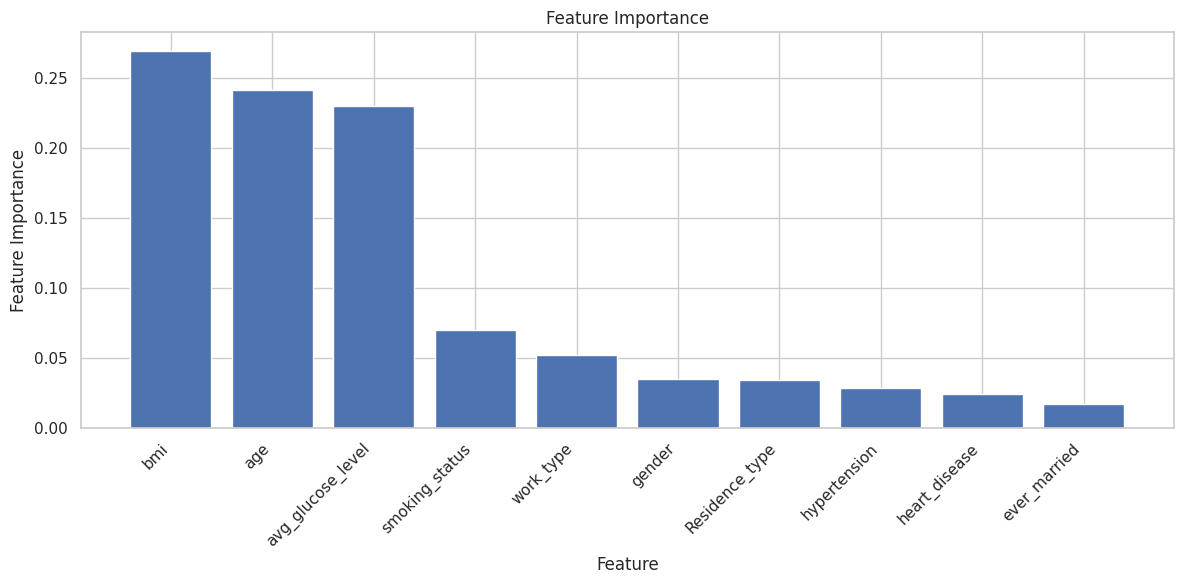

In [ ]:
# Membuat DataFrame untuk menyimpan nama fitur
feature_names = fitur.columns
feature_importances = pd.Series(rf1.feature_importances_, index=feature_names).sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(feature_importances.index, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dapat dilihat bahwa fitur yang memiliki peranan penting dalam pengklasifikan stroke adalah fitur bmi, age, avg_glucose_level yang menjadi fitur penting kemudian diikutin fitur lainya.

In [ ]:
# Kurva Akurasi Model yang dibuat dengan nilai K yang berbeda
mean_acc = np.zeros(30)
for i in range(1,31):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

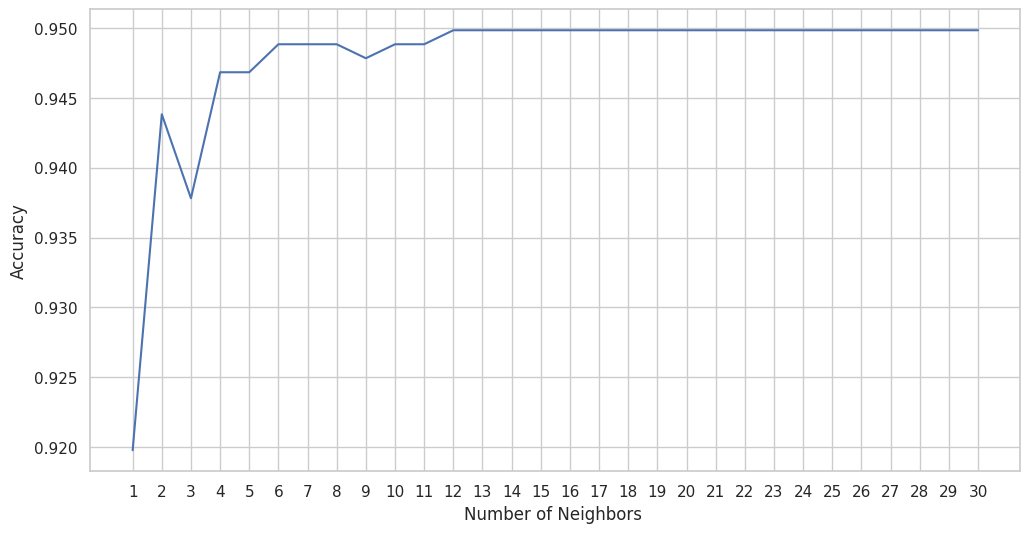

In [ ]:
loc = np.arange(1,31,step=1.0)
plt.figure(figsize = (12, 6))
plt.plot(range(1,31), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

Dapat dilihat kurva diatas menunjukkan semakin meningkatnya nilai K atau n_neighbors, semakin meningkat pula nilai akurasi model. Namun, perlu diperhatikan bahwa terdapat batas maksimal pada nilai akurasi sekitar 0.95, di mana peningkatan lebih lanjut dalam nilai k tidak lagi memberikan peningkatan yang signifikan dalam akurasi model.